In [1]:
from matplotlib.ticker import FuncFormatter
import pandas as pd

import sys
sys.path.append('../_styling/')
from style import prep_plot, BLACK, GRAY1, GRAY2, GRAY3

In [2]:
df = pd.read_csv("tech_vc_funding.csv")
df.dropna(inplace=True)
df

,Year,Crypto (Global),AI/ML (US),Tech (US)
4,2017.0,0.92,15.5,72.0
5,2018.0,5.30,26.9,125.5
6,2019.0,3.20,31.8,120.7
7,2020.0,4.20,39.1,143.4
8,2021.0,24.80,80.2,304.8
9,2022.0,29.20,54.4,208.6
10,2023.0,9.30,62.6,146.5


<Figure size 3740x1496 with 0 Axes>

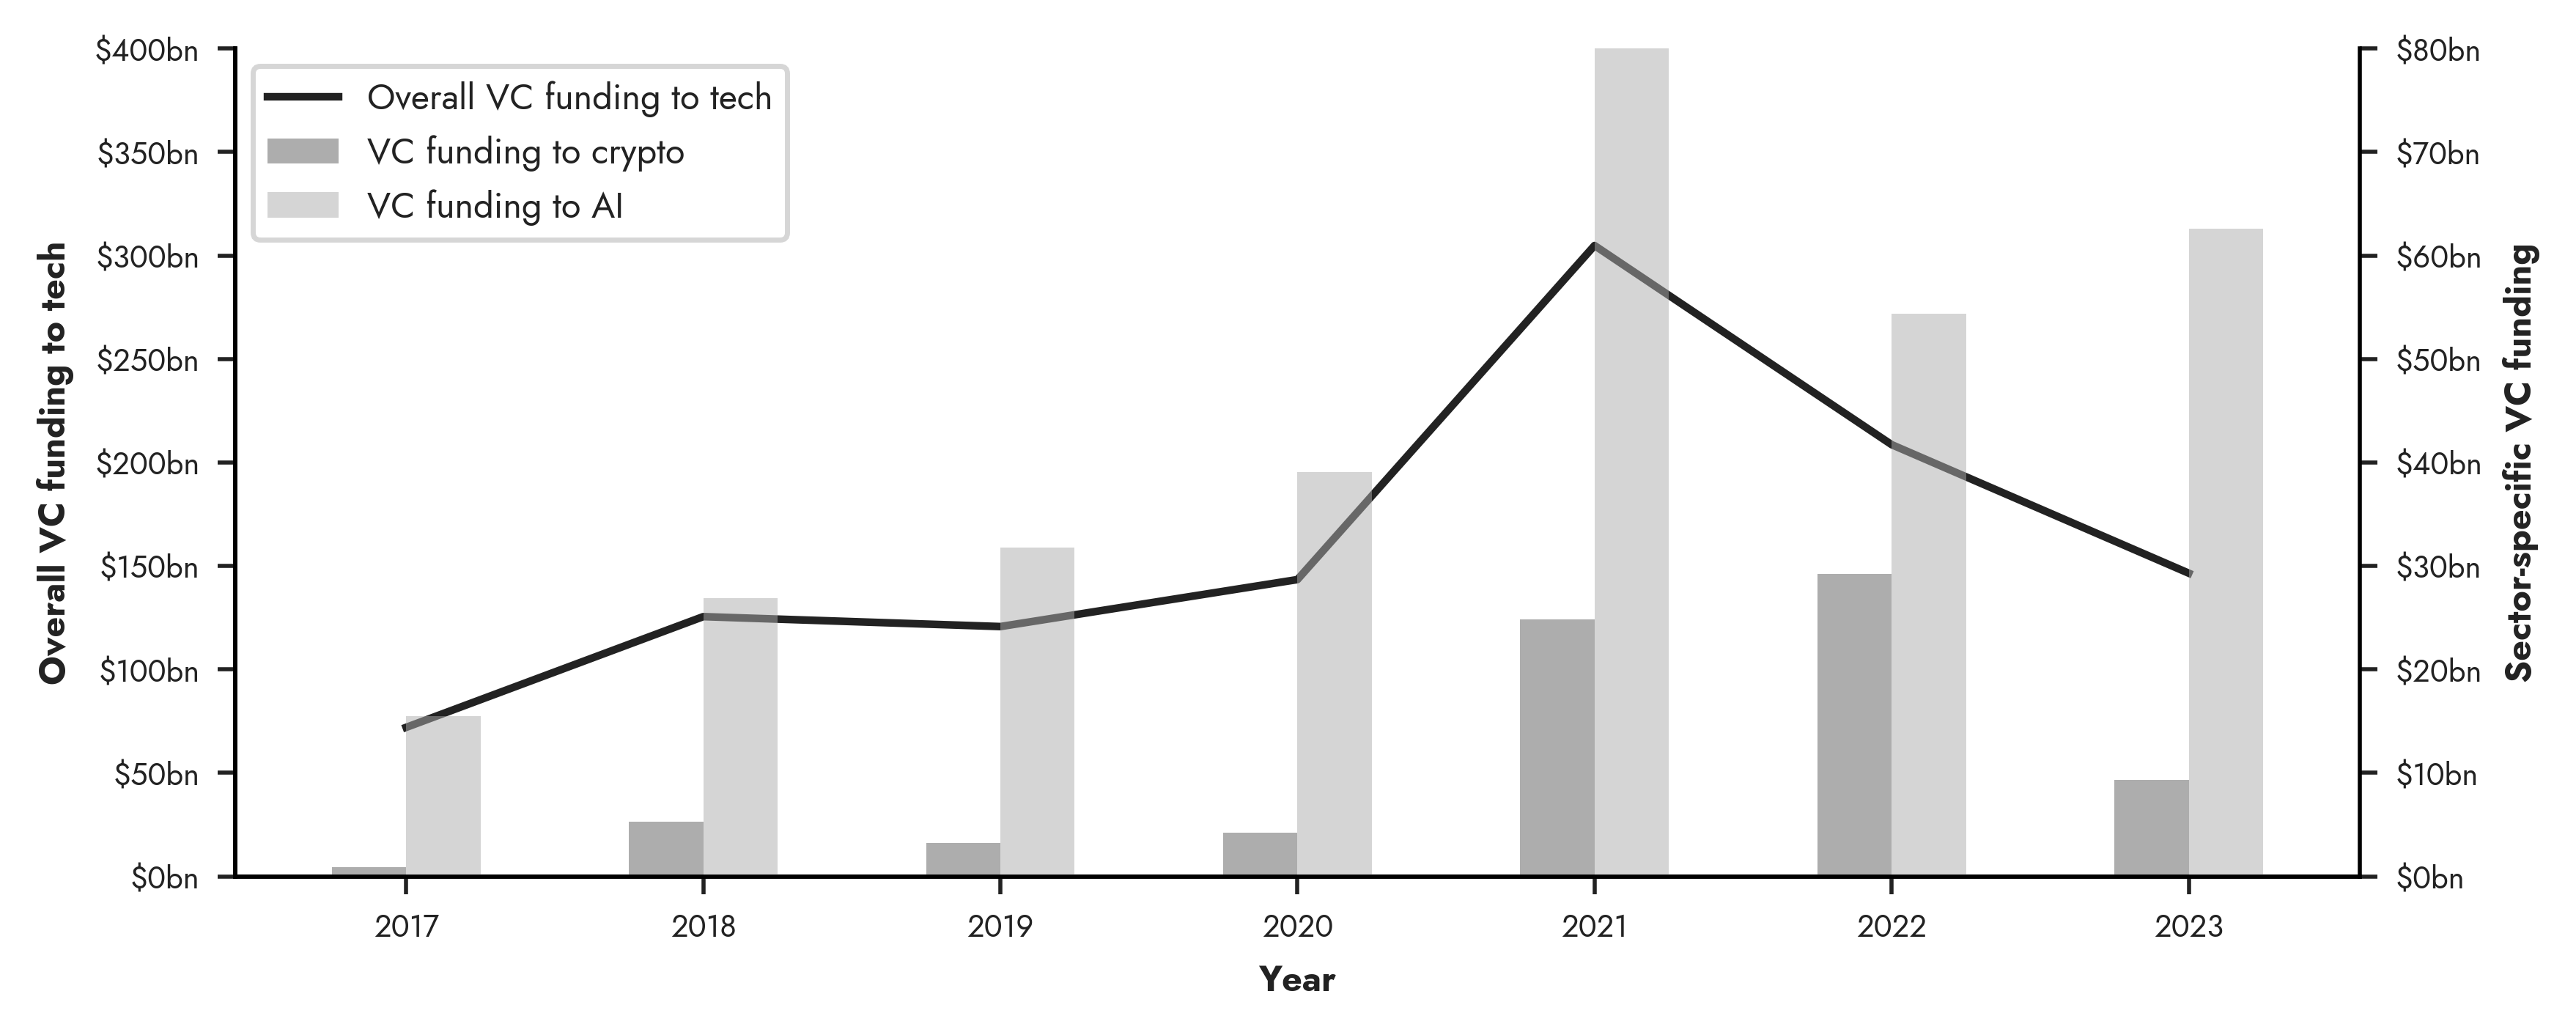

In [4]:
# Plotting
plt = prep_plot()
fig, ax1 = plt.subplots()

FONTSIZE = 6

# Line chart
ax1.plot(df['Year'], df['Tech (US)'], color=BLACK, label='Overall VC funding to tech', zorder=3)
ax1.set_xlabel('Year', fontsize=FONTSIZE+1, weight='bold')
ax1.set_ylabel('Overall VC funding to tech', fontsize=FONTSIZE+1, weight='bold')
ax1.tick_params('both', labelsize=FONTSIZE)
ax1.set_xticks(df['Year'])
ax1.set_ylim(0, 400)

# Bar chart (secondary axis)
ax2 = ax1.twinx()
ax2.bar(df['Year'] - .125, df['Crypto (Global)'], width=0.25, alpha=0.5, color=GRAY1, label='VC funding to crypto', zorder=1)
ax2.bar(df['Year'] + .125, df['AI/ML (US)'], width=0.25, alpha=0.5, color=GRAY2, label='VC funding to AI', zorder=2)
ax2.set_ylabel('Sector-specific VC funding', fontsize=FONTSIZE+1, weight='bold')
ax2.tick_params('y', labelsize=FONTSIZE)
ax2.set_ylim(0, 80)

# Define a formatter function to format tick labels in billions
def billions_formatter(x, pos):
    return '${:.0f}bn'.format(x)
ax1.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
ax2.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, fontsize=FONTSIZE+1)

ax2.spines[['right']].set_visible(True)

plt.savefig("tech_vc_funding.png")